In [1]:
import numpy as np
import astropy.units as u
import astropy.constants as const
from astropy.coordinates import Distance
import matplotlib.pyplot as plt

import sys
sys.path.append("/home/jsitarek/zdalne/agnpy/agnpy/")
# import agnpy classes
#from agnpy.emission_regions import Blob
from agnpy.targets import SSDisk

In [29]:
L_disk = 6 * 1e44 * u.Unit("erg s-1")
M_BH=1.e8*const.M_sun
z=0.06
disk1 = SSDisk(M_BH, L_disk, 1/12, 6, 100,  R_g_units=True)
disk2 = SSDisk(M_BH, L_disk, 1/12, 6, 1000, R_g_units=True)
disk3 = SSDisk(M_BH, L_disk, 1/12, 6, 10000, R_g_units=True)

In [30]:
nudisk = np.logspace(12, 18, 100) * u.Hz # for Disk SED calculations
disk_sed1 = disk1.sed_flux(nudisk, z)
disk_sed2 = disk2.sed_flux(nudisk, z)
disk_sed3 = disk3.sed_flux(nudisk, z)

/home/jsitarek/anaconda3/lib/python3.7/site-packages/astropy/units/quantity.py:481: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [31]:
plt.figure(); 
plt.rc("figure", figsize=(7.5, 5.5))
plt.rc("font", size=12)
plt.rc("axes", grid=True)
plt.rc("grid", ls=":")
sed_x_label = r"$\nu\,/\,Hz$"
sed_y_label = r"$\nu F_{\nu}\,/\,(\mathrm{erg}\,\mathrm{cm}^{-2}\,\mathrm{s}^{-1})$"

<Figure size 540x396 with 0 Axes>

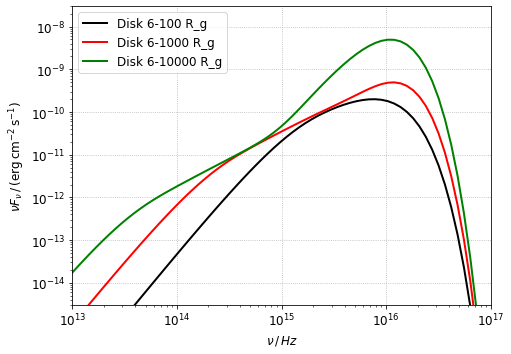

In [34]:
plt.loglog(nudisk, disk_sed1, color='k', ls='-', lw=2, label="Disk 6-100 R_g")
plt.loglog(nudisk, disk_sed2, color='r', ls='-', lw=2, label="Disk 6-1000 R_g")
plt.loglog(nudisk, disk_sed3, color='g', ls='-', lw=2, label="Disk 6-10000 R_g")
plt.ylim(3e-15, 3e-8)  
plt.xlim(1e13, 1e17)
plt.xlabel(sed_x_label)
plt.ylabel(sed_y_label)
plt.legend()
plt.show()

In [35]:
print(L_disk)
for disk_sed in [disk_sed1, disk_sed2, disk_sed3]:
    print((np.trapz(disk_sed/nudisk, nudisk)*4*np.pi*Distance(z=z)**2).to("erg s-1"))

6.0000000000000005e+44 erg / s
3.512200954275146e+45 erg / s
7.421057308225961e+45 erg / s
6.256484323201531e+46 erg / s
